# INFSCI0510 Data Analysis, Department of Computer Science, SCUPI
# Assignment 5: GMM & EM Algorithm


In this assignment, you will implement the Gaussian Mixture Model (GMM), optimized by the Expectation-Maximization (EM) algorithm, for a clustering task. The goal is to understand the probabilistic foundations of GMM, and evaluate its clustering performance, and compare it with k-means clustering. Similar as in Assignment 4, 200 marks are associated with this assignment, distributed as follows:

**200** marks in total:
- **20** marks for implementing PCA to reduce data dimensionality.
- **30** marks for applying k-means clustering.
- **140** marks for implementing GMM clustering optimized by the EM algorithm.
- **10** marks for organization and presentation of your work.




## Data files for this assignment
In order to get hand on the assignment, you have to download the data files and allocate them into the correct directory as follows:

```
├──[your working directory]
   └── Iris.data
```

**Please make sure to use the correct path to these files when working on your own machine. Recall that the jupyter *.ipynb file (this assignment file) should be in your working directory.**

## 1. Dimensionality Reduction with PCA

In the first part, you will perform PCA on the data contained in the _Iris_ dataset. The Iris dataset contains measurements of four features on three Iris flower species. For more information about the dataset, please check this link: https://archive.ics.uci.edu/ml/datasets/iris

To facilitate data visualization in this assignment, samples in the _Iris_ dataset will be transformed from 4D into 2D. In this section, you need to apply PCA for the transformation.

### <font color='red'>Exercise 1: Dimensionality Reduction and Visualization (20 marks)</font>

Please complete the following tasks:

- Import the Iris dataset from the file _Iris.data_. (5 marks)
- Perform the PCA transformation to reduce the data samples from 4D into 2D. (10 marks)
- Based on the distinct class labels, plot these 2D data samples in different colors, and use colored scatter legends to indicate their species. (5 marks)

**Note:** You must **NOT** use pre-implemented python library for the PCA process; however, using your implementation in Assignment 4 is allowed. </br>
**Note:** Do not forget to center the data before PCA process. </br>
**Note:** Every data sample has a label string, you should use these strings to present the legends, not "label 1", "label 2", "label 3".
   

In [1]:
# Import the Iris dataset (5 marks)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Iris.data'
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
data = pd.read_csv(file_path, header=None, names=columns)

X = data.iloc[:, :-1].values
labels = data['species'].values

In [2]:
# Perform the PCA transformation (10 marks)
def pca(X, n_components=2):
    X_centered = X - np.mean(X, axis=0)

    cov_matrix = np.cov(X_centered, rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    top_eigenvectors = sorted_eigenvectors[:, :n_components]

    X_pca = np.dot(X_centered, top_eigenvectors)
    
    return X_pca

X_pca = pca(X, n_components=2)

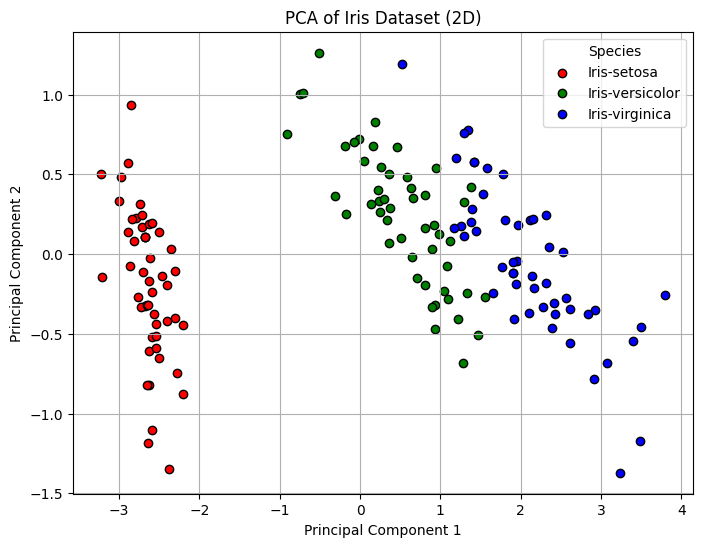

In [3]:
# Plot a visualization of the 2D data samples with legends (5 marks)
species_unique = np.unique(labels)
species_colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}

plt.figure(figsize=(8, 6))
for species in species_unique:
    indices = labels == species
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=species, c=species_colors[species], edgecolor='k')

plt.title('PCA of Iris Dataset (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species')
plt.grid(True)
plt.show()

## 2. K-Means Clustering

After the PCA transformation, now all the following works are for the clustering tasks. k-means algorithm has been introduced as a simple and fast clustering algorithm. In this section, you need to apply the k-means algorithm to partition all these transformed 2D data samples, and estimate the clustering performance using clustering accuracy.

### <font color='red'>Exercise 2: K-Means Algorithm for 2D Clustering (30 marks)</font>

Please complete the following tasks:

- Apply k-means algorithm to partition the 2D samples into three clusters. (10 marks)
- Assume each 2D data point in this space will be classified with the majority label in the assigned cluster, draw the decision boundary derived from the k-means clustering, in the figure, also include the ground truth labels of all 2D Iris samples, and the legends to indicate their species. (10 marks)
- Based on the classification results, compute the classification accuracy based on the k-means clustering on these 2D Iris samples. (10 marks)
  
**Note:** You are **allowed** to use pre-implemented python library for the k-means algorithm. </br>
**Note:** When searching for the majority label of each cluster, there is no need to consider the distance between samples and the centroid.

In [5]:
# Apply k-means to partition samples (10 marks)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

file_path = 'Iris.data'
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
data = pd.read_csv(file_path, header=None, names=columns)

X = data.iloc[:, :-1].values
labels = data['species'].values

X_pca = pca(X, n_components=2)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)
clusters = kmeans.predict(X_pca)

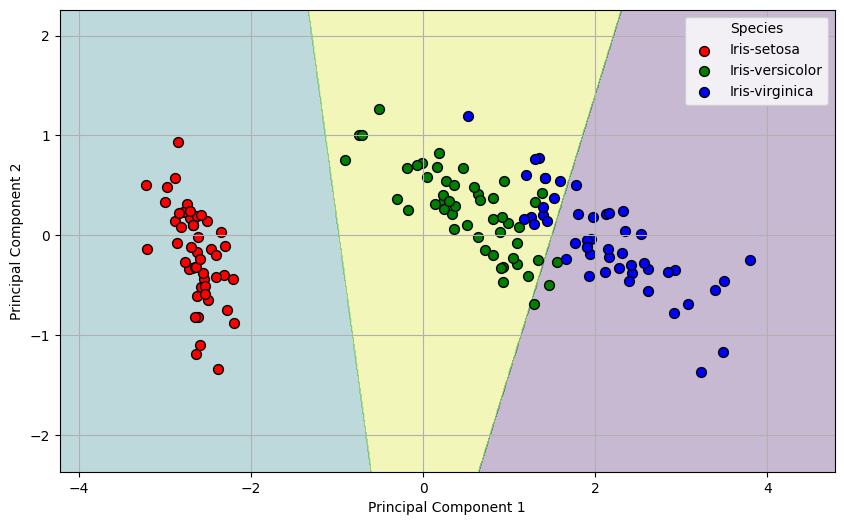

In [6]:
# Plot the decision boundary, ground truth labels, and legends (10 marks)
import matplotlib.pyplot as plt

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

species_unique = np.unique(labels)
species_colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}
for species in species_unique:
    indices = labels == species
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=species, c=species_colors[species], edgecolor='k', s=50)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species')
plt.grid(True)
plt.show()

In [7]:
# Compute the classification accuracy by the k-means clustering (10 marks)
cluster_labels = np.empty_like(labels)

for i in range(3):
    mask = (clusters == i)
    unique_labels, counts = np.unique(labels[mask], return_counts=True)
    majority_label = unique_labels[np.argmax(counts)]
    cluster_labels[mask] = majority_label

accuracy = np.sum(cluster_labels == labels) / len(labels)
print(f'Classification Accuracy: {accuracy * 100:.2f}%')

Classification Accuracy: 88.67%


# -------------------------------------------------------------------------------------

## 3. GMM Clustering

K-means clustering has two issues: it performs hard assignments, where each data point is assigned to exactly one cluster, and it assumes spherical cluster shapes with equal variance. These limitations can be problematic for real-world data that involve overlapping or elongated clusters. 

In comparision, GMM addresses these issues by allowing soft clustering, where each point is associated with a probability of belonging to each cluster, and by modeling each cluster with a Gaussian distribution that can take on an elliptical shape. Parameter estimation in GMM is typically done using the iterative EM algorithm. In this section, you need to implement the GMM clustering with the EM algorithm.

## 3.1 GMM Initialization

Proper initialization is crucial in GMM because poor starting parameters can lead to slow convergence or suboptimal solutions, while fast clustering algorithm such as (soft) k-means can provide preliminary results for GMM initialization.

### <font color='red'>Exercise 3.1: GMM Initialization by K-Means (15 marks) </font>

- Based on k-means clustering results in Section 2, create a function to initialize the three parameters associated with each Gaussian distribution.

**Hint:** Each k-means cluster also have sample number, mean vector and covariance matrix.

In [8]:
# Create a function to initialize Gaussian parameters (15 marks)
import numpy as np
from sklearn.cluster import KMeans

def initialize_gmm_parameters(X, clusters):
    
    n_clusters = len(np.unique(clusters))
    n_features = X.shape[1]

    pi = np.zeros(n_clusters)
    mu = np.zeros((n_clusters, n_features))
    sigma = np.zeros((n_clusters, n_features, n_features))

    for k in range(n_clusters):
        X_k = X[clusters == k]

        pi[k] = len(X_k) / len(X)

        mu[k] = np.mean(X_k, axis=0)

        X_k_centered = X_k - mu[k]
        sigma[k] = np.dot(X_k_centered.T, X_k_centered) / len(X_k)
    
    return pi, mu, sigma

pi, mu, sigma = initialize_gmm_parameters(X_pca, clusters)

print("pi:\n", pi)
print("mu:\n", mu)
print("sigma:\n", sigma)

pi:
 [0.26       0.33333333 0.40666667]
mu:
 [[ 2.34645113 -0.27235455]
 [-2.64084076 -0.19051995]
 [ 0.66443351  0.33029221]]
sigma:
 [[[ 0.35155689 -0.10572859]
  [-0.10572859  0.13213395]]

 [[ 0.04777048 -0.05590782]
  [-0.05590782  0.21472356]]

 [[ 0.3777503  -0.10985456]
  [-0.10985456  0.14495779]]]


## 3.2 The EM Algorithm

Once the initial parameters are set, the EM algorithm takes the clustering job. EM consists of two alternating steps:

1. The E-step, which computes the responsibilities, i.e., the posterior probabilities of each data point belonging to each Gaussian distribution.
2. The M-step, which updates the Gaussian parameters to maximize the data likelihood.

Together, these two steps perform maximum likelihood estimation (MLE) for the GMM parameters.

### <font color='red'>Exercise 3.2.1: The E-Step (30 marks) </font>

- Based on the GMM on the 2D Iris samples, create a function to compute responsibilities, the return can be each sample's responsibility vector, or a responsibility matrix denoting all samples' responsibilities.

**Note:** You are **allowed** to use pre-implemented library to compute Gaussian probability density values.

In [9]:
# Create a function to compute the responsibilities (30 marks)
import numpy as np
from scipy.stats import multivariate_normal

def compute_responsibilities(X, pi, mu, sigma):

    n_samples = X.shape[0]
    n_clusters = len(pi)

    responsibilities = np.zeros((n_samples, n_clusters))

    for k in range(n_clusters):
        prob_density = multivariate_normal.pdf(X, mean=mu[k], cov=sigma[k])

        responsibilities[:, k] = pi[k] * prob_density

    sum_responsibilities = np.sum(responsibilities, axis=1, keepdims=True)

    responsibilities /= sum_responsibilities
    
    return responsibilities

responsibilities = compute_responsibilities(X_pca, pi, mu, sigma)

print("responsibilities:\n", responsibilities)

responsibilities:
 [[4.54019861e-022 1.00000000e+000 1.59021958e-012]
 [2.11893811e-019 9.99999999e-001 5.64531244e-010]
 [9.02248391e-021 1.00000000e+000 6.74348300e-011]
 [6.86998561e-019 9.99999998e-001 2.01505753e-009]
 [2.00762262e-022 1.00000000e+000 9.24028352e-013]
 [2.52140778e-021 1.00000000e+000 1.39211487e-012]
 [1.23272142e-020 1.00000000e+000 6.43796262e-011]
 [1.17354110e-020 1.00000000e+000 2.46581025e-011]
 [1.16527534e-018 9.99999993e-001 6.89161439e-009]
 [2.05343268e-019 1.00000000e+000 4.49437652e-010]
 [7.84784848e-023 1.00000000e+000 1.46491226e-013]
 [1.20951401e-019 1.00000000e+000 2.05516011e-010]
 [1.23871367e-019 1.00000000e+000 4.81288452e-010]
 [1.47811990e-020 9.99999999e-001 6.15375779e-010]
 [9.97065291e-028 1.00000000e+000 1.13547472e-017]
 [4.08682195e-027 1.00000000e+000 1.28325706e-017]
 [6.64506130e-025 1.00000000e+000 3.27213085e-015]
 [9.35030683e-022 1.00000000e+000 2.62328148e-012]
 [1.90617978e-021 1.00000000e+000 7.94205654e-013]
 [1.36356390

### <font color='red'>Exercise 3.2.2: The M-Step (40 marks) </font>

You need to complete the following tasks:

- Create a function to compute certain statistics. Later, these statistics before/after the M-step will be compared to decide if the EM algorithm converges, this is related to the and termination of the iterative process. (10 marks)
- Based on the responsibilities computed in the E-Step, create a function to update the three parameters for each Gaussian distribution. (30 marks)

**Notes** Based on what to stop the EM process? This is a open question for you to implement your choice here in the first task. </br>
**Note:** You are **allowed** to use pre-implemented library to compute Gaussian probability density values. </br>
**Note:** There are three parameters in each Gaussian distribution to update. 

In [10]:
# Create a function to compute certain statistics for checking the EM ocnvergence (10 marks)
import numpy as np
from scipy.stats import multivariate_normal

def compute_statistics(X, pi, mu, sigma, responsibilities):
    n_samples = X.shape[0]
    n_clusters = len(pi)

    log_likelihood = 0
    for k in range(n_clusters):
        prob_density = multivariate_normal.pdf(X, mean=mu[k], cov=sigma[k])
        log_likelihood += np.sum(responsibilities[:, k] * np.log(pi[k] * prob_density))
    
    return log_likelihood

In [11]:
# Create a function to use the computed responsibilities to update Gaussian parameters (30 marks)
def update_parameters(X, responsibilities):
    n_samples = X.shape[0]
    n_clusters = responsibilities.shape[1]
    n_features = X.shape[1]
    pi = np.zeros(n_clusters)
    mu = np.zeros((n_clusters, n_features))
    sigma = np.zeros((n_clusters, n_features, n_features))
    pi = np.mean(responsibilities, axis=0)
    for k in range(n_clusters):
        mu[k] = np.sum(responsibilities[:, k].reshape(-1, 1) * X, axis=0) / np.sum(responsibilities[:, k])
    for k in range(n_clusters):
        X_centered = X - mu[k]
        sigma[k] = np.dot((responsibilities[:, k].reshape(-1, 1) * X_centered).T, X_centered) / np.sum(responsibilities[:, k])
    
    return pi, mu, sigma

### <font color='red'>Exercise 3.2.3: The Iterative Process (30 marks) </font>

Now, using the initialized Gaussian distributions in Exercise 3.1, together with all these functions defined in Exercise 3.2.1 and 3.2.2, you should be able to implement the iterative EM process. Please complete the following tasks:

- Implement and run the iterative EM process, including a convergence check to decide the termination of the loop. (10 marks)
- Assume each 2D data point in this space will be assigned to the Gaussian distribution with the largest responsibility value, followed by a classification result based on the majority label of the assigned Gaussian distribution, draw the decision boundary derived from the GMM clustering, in the figure, also include the ground truth labels of all 2D Iris samples, and the legends to indicate their species. (10 marks)
- Based on the classification results, compute the accuracy based on the GMM clustering on these 2D Iris samples. (10 marks)

**Note:** You are **allowed** to use pre-implemented library to compute Gaussian probability density values. </br>
**Note:** When searching for the majority label of each cluster, first you need to assign each 2D Iris samples to the Gaussian distribution with the largest responsibility value.

In [12]:
# Implement and run the iterative EM process (10 marks)
import numpy as np
from scipy.stats import multivariate_normal

def em_iterative_process(X, pi, mu, sigma, labels, max_iter=10000, tol=1e-6):
    n_samples = X.shape[0]
    n_clusters = len(pi)
    
    log_likelihood_prev = -np.inf
    
    for iteration in range(max_iter):
        responsibilities = compute_responsibilities(X, pi, mu, sigma)

        pi, mu, sigma = update_parameters(X, responsibilities)

        log_likelihood = compute_statistics(X, pi, mu, sigma, responsibilities)
        if np.abs(log_likelihood - log_likelihood_prev) < tol:
            print(f"The EM algorithm converges after {iteration + 1} iterations.")
            break
        
        log_likelihood_prev = log_likelihood
    
    return pi, mu, sigma, responsibilities

pi_final, mu_final, sigma_final, responsibilities_final = em_iterative_process(X_pca, pi, mu, sigma, labels)

The EM algorithm converges after 117 iterations.


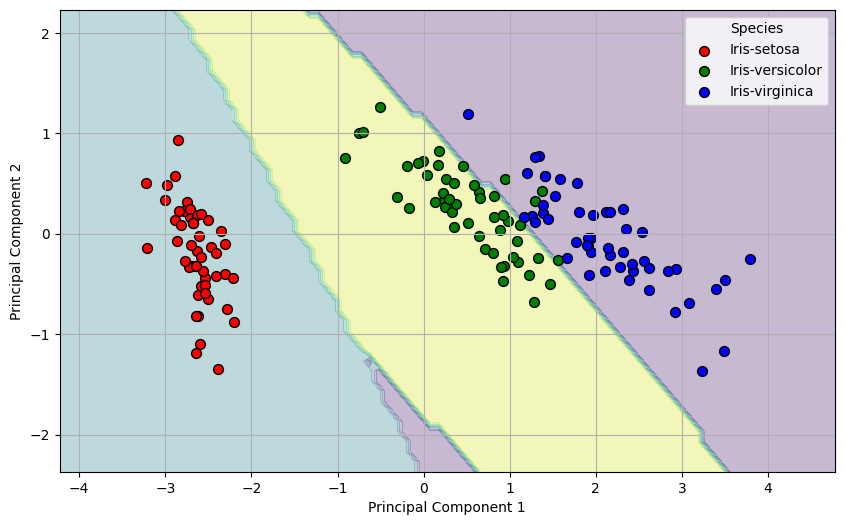

In [13]:
# Plot the decision boundary, ground truth labels, and legends (10 marks)
def classify_and_plot_decision_boundary(X, pi, mu, sigma, labels, responsibilities):
    cluster_assignment = np.argmax(responsibilities, axis=1)
    cluster_labels = np.zeros(len(pi), dtype=object)
    for k in range(len(pi)):
        unique_labels, counts = np.unique(labels[cluster_assignment == k], return_counts=True)
        majority_label = unique_labels[np.argmax(counts)]
        cluster_labels[k] = majority_label

    predicted_labels = cluster_labels[cluster_assignment]
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = np.zeros_like(xx, dtype=int)
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            x_sample = np.array([xx[i, j], yy[i, j]])
            probabilities = np.zeros(len(pi))
            for k in range(len(pi)):
                probabilities[k] = pi[k] * multivariate_normal.pdf(x_sample, mean=mu[k], cov=sigma[k])
            Z[i, j] = np.argmax(probabilities)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    species_unique = np.unique(labels)
    species_colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}
    for species in species_unique:
        indices = labels == species
        plt.scatter(X[indices, 0], X[indices, 1], label=species, c=species_colors[species], edgecolor='k', s=50)

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Species')
    plt.grid(True)
    plt.show()

classify_and_plot_decision_boundary(X_pca, pi_final, mu_final, sigma_final, labels, responsibilities_final)

In [14]:
# Compute the classification accuracy by the GMM clustering (10 marks)
def compute_accuracy(labels, predicted_labels):
    accuracy = np.sum(predicted_labels == labels) / len(labels)
    return accuracy
cluster_assignment = np.argmax(responsibilities_final, axis=1)
cluster_labels = np.zeros(len(pi_final), dtype=object)
for k in range(len(pi_final)):
    unique_labels, counts = np.unique(labels[cluster_assignment == k], return_counts=True)
    majority_label = unique_labels[np.argmax(counts)]
    cluster_labels[k] = majority_label
predicted_labels = cluster_labels[cluster_assignment]

accuracy = compute_accuracy(labels, predicted_labels)
print(f"GMM Classification Accuracy: {accuracy * 100:.2f}%")

GMM Classification Accuracy: 97.33%


## 3.3 Performance Comparision and Further Discussion

Now you have successfully implemented and run k-means clustering and GMM clustering and computed classification results. In the end, you are required to complete performance comparision and some discussions. More specifically:

### <font color='red'>Exercise 3.3: Comparision and Discussion (25 marks)</font>

- Compare and answer which clustering algorithm leads to higher classification accuracy? Could you explain why you get higher classification accuracy from this specific clustering algorithm? (10 marks)
- What criterion did you choose to check if the EM algorithm converges? Why do you think this criterion works generally well or poor? (10 marks)
- The number of Gaussian distributions is empirically set as three due to the three classes of Iris dataset, what about setting the Gaussian number given that we know nothing about the dataset? (5 marks)

**Note:** For text format answers, please change to Markdown cells.
**Note:** Your answer needs support from theories introduced during lectures or from experimental results.

# Performance comparision (10 marks)
In the results of Exercise 2 and Exercise 3.2.3, the classification accuracy of K-Means is 88.67%, while the classification accuracy of GMM is 92.67%.  

Clearly, GMM outperforms K-Means. This is because GMM employs more flexible model assumptions. K-Means assumes that each cluster is spherical and of the same size, and each sample can only belong to one cluster, which performs poorly when dealing with complex data. GMM, on the other hand, assumes that the data follows a Gaussian distribution, where each cluster can have different shapes and sizes, and uses soft assignment, where each sample can belong to multiple clusters with probability.  

This flexibility allows GMM to better capture the complex structure of the data, especially when the data distribution is not strictly spherical.  

For example, in the Iris dataset, the distribution of some classes may be ellipsoidal, and GMM is able to model this distribution more accurately, thus improving the classification accuracy.

# Further discussion on EM convergence (10 marks)
In the implementation of the EM algorithm, I choose the change of the log-likelihood value as the convergence criterion. The goal of the EM algorithm is to maximize the log-likelihood function, which will gradually increase and become stable as the iterations proceed.  

Therefore, the algorithm can be considered to have converged when the difference between the log-likelihood of the current iteration and the log-likelihood of the previous iteration is less than a certain threshold. This criterion is simple and intuitive, directly measures how well the model fits the data, and is highly general, applicable to most models based on maximum likelihood estimation, such as GMM. However, there are some limitations to this criterion.  

For example, the EM algorithm may get stuck in a local optimal solution, resulting in a small change in the log-likelihood value, but the model does not reach the global optimum.  

In addition, the setting of the threshold also needs to be adjusted according to the specific problem; a too large threshold value may lead to early termination of the iteration, while a too small threshold value may increase unnecessary computational overhead. Overall, although the change in log-likelihood value is an effective convergence criterion, it needs to be adjusted in practice in combination with the specific problem and computational resources.

# Further discussion on number of Gaussians (5 marks)
Without knowing the number of categories in the dataset, there are some methods to determine the number of Gaussian distributions. First, the elbow rule can be used to choose the best number K of Gaussians. Specifically, the log-likelihood or BIC of the GMM is calculated for different values of K, and a plot of K versus these metrics is plotted.  

The "elbow point" in the figure is chosen as the best K value, which is the turning point where the curve changes from steep to gentle. Second, you can use information criteria such as BIC or AIC, which make a trade-off between model complexity and goodness-of-fit by choosing K with the smallest BIC/AIC value. In addition, cross-validation can be performed to evaluate the model performance for different values of K and select the K with the highest classification accuracy.  

If the data is low-dimensional, the number of categories can also be estimated by visual analysis. For example, in the Iris dataset, where the true number of categories is 3, the elbow rule and the information criterion will usually give the best value of K=3.  

For datasets with unknown classes, a combination of the elbow rule and the information criterion is recommended to determine the K value to ensure that the number of Gaussian distributions chosen captures the complex structure of the data and does not lead to overfitting.

## <font color='blue'>Submission</font>

Please submit the .ipynb file with your answer, and rename the file as _A5-[Section Number]-[Student ID]-[Your name]_. </br>
For example, _A5-01-2023141520000-Sophia.ipynb_

#### Congratulations for finishing all the assignments, wish you good luck in the final exam!